<a href="https://colab.research.google.com/github/zgywyww/Federal-Reserve-Sentiment/blob/main/Baseline_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
!wget https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/full_df.csv
meta = pd.read_csv('full_df.csv')
meta = meta.drop(columns='Unnamed: 0')
meta.head()

--2023-12-19 00:26:53--  https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/full_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63140 (62K) [text/plain]
Saving to: ‘full_df.csv’

full_df.csv         100%[===================>]  61.66K  --.-KB/s    in 0.003s  

2023-12-19 00:26:53 (17.4 MB/s) - ‘full_df.csv’ saved [63140/63140]



,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,RSAFS_year,UMCSENT_year,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health
0,1996-01-01,7.03,5.56,11614.418,5.6,3.775768,208699.0,89.3,6.5,NaN,...,3.53520,-8.50410,-0.71429,0.74905,0.00000,46.36763,-0.80799,-1.86813,10879.309158,-0.364854
1,1996-02-01,7.03,5.22,NaN,5.5,2.618961,212008.0,88.5,6.5,NaN,...,6.85941,-6.94006,-6.11511,NaN,-1.78571,-30.63766,1.58554,-0.89586,NaN,-0.304166
2,1996-03-01,7.03,5.31,NaN,5.5,3.110565,213891.0,93.7,6.5,NaN,...,6.81359,3.76523,1.72414,NaN,0.00000,18.77096,0.88817,5.87571,NaN,-0.304166
3,1996-04-01,7.03,5.22,11808.140,5.6,3.133276,214676.0,92.7,6.5,NaN,...,6.78698,0.21622,-1.69492,1.66794,1.81818,0.73012,0.36701,-1.06724,10961.169453,-0.364854
4,1996-05-01,7.03,5.24,NaN,5.6,2.937790,216299.0,89.4,6.5,NaN,...,6.55858,-0.44543,0.38314,NaN,0.00000,-6.23902,0.75602,-3.55987,NaN,-0.364854


In [ ]:
!wget https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/federal_reserve_statement_1999_2023.csv
stmt = pd.read_csv('federal_reserve_statement_1999_2023.csv')
stmt.head()

--2023-12-19 00:26:53--  https://raw.githubusercontent.com/zgywyww/Federal-Reserve-Sentiment/main/federal_reserve_statement_1999_2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 565489 (552K) [text/plain]
Saving to: ‘federal_reserve_statement_1999_2023.csv’

federal_reserve_sta 100%[===================>] 552.24K  --.-KB/s    in 0.03s   

2023-12-19 00:26:54 (17.2 MB/s) - ‘federal_reserve_statement_1999_2023.csv’ saved [565489/565489]



,link,title,speaker,event,year,text,date,text_len,location,decision
0,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Reserve relea...,1999-05-18,164,NaN,0
1,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate release\tThe Federal Open Market...,1999-06-30,172,NaN,1
2,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Open Market C...,1999-08-24,227,NaN,1
3,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Open Market C...,1999-10-05,181,NaN,0
4,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate release\tThe Federal Open Market...,1999-11-16,252,NaN,1


In [ ]:
meta.columns

Index(['date', 'effective_rate', 'FEDFUNDS', 'GDPC1', 'UNRATE',
       'MEDCPIM158SFRBCLE', 'RSAFS', 'UMCSENT', 'target_lower', 'target_upper',
       'FEDFUNDS_year', 'GDPC1_year', 'UNRATE_year', 'MEDCPIM158SFRBCLE_year',
       'RSAFS_year', 'UMCSENT_year', 'FEDFUNDS_month', 'GDPC1_month',
       'UNRATE_month', 'MEDCPIM158SFRBCLE_month', 'RSAFS_month',
       'UMCSENT_month', 'GDPPOT', 'UNRATE_health'],
      dtype='object')

In [ ]:
meta['GDPC1']=meta['GDPC1'].fillna(method='ffill')
meta['GDPPOT']=meta['GDPPOT'].fillna(method='ffill')
meta['GDPC1_month']=meta['GDPC1_month'].fillna(method='ffill')
meta['GDPC1_year']=meta['GDPC1_year'].fillna(method='ffill')

meta['target_upper'] = meta['target_upper'].fillna(meta['target_lower'])
meta.head()

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,RSAFS_year,UMCSENT_year,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health
0,1996-01-01,7.03,5.56,11614.418,5.6,3.775768,208699.0,89.3,6.5,6.5,...,3.53520,-8.50410,-0.71429,0.74905,0.00000,46.36763,-0.80799,-1.86813,10879.309158,-0.364854
1,1996-02-01,7.03,5.22,11614.418,5.5,2.618961,212008.0,88.5,6.5,6.5,...,6.85941,-6.94006,-6.11511,0.74905,-1.78571,-30.63766,1.58554,-0.89586,10879.309158,-0.304166
2,1996-03-01,7.03,5.31,11614.418,5.5,3.110565,213891.0,93.7,6.5,6.5,...,6.81359,3.76523,1.72414,0.74905,0.00000,18.77096,0.88817,5.87571,10879.309158,-0.304166
3,1996-04-01,7.03,5.22,11808.140,5.6,3.133276,214676.0,92.7,6.5,6.5,...,6.78698,0.21622,-1.69492,1.66794,1.81818,0.73012,0.36701,-1.06724,10961.169453,-0.364854
4,1996-05-01,7.03,5.24,11808.140,5.6,2.937790,216299.0,89.4,6.5,6.5,...,6.55858,-0.44543,0.38314,1.66794,0.00000,-6.23902,0.75602,-3.55987,10961.169453,-0.364854


In [ ]:
meta['date'] = pd.to_datetime(meta['date'], format='%Y-%m-%d')
meta = meta[meta['date'].dt.year >= 1999]
meta.head()

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,RSAFS_year,UMCSENT_year,FEDFUNDS_month,GDPC1_month,UNRATE_month,MEDCPIM158SFRBCLE_month,RSAFS_month,UMCSENT_month,GDPPOT,UNRATE_health
36,1999-01-01,7.03,4.63,13315.597,4.3,1.549172,246868.0,103.9,6.5,6.5,...,6.59838,-2.53283,-1.06838,0.93943,-2.27273,-22.29541,0.13710,3.38308,12149.437434,0.336839
37,1999-02-01,7.03,4.76,13315.597,4.4,1.740411,249520.0,108.1,6.5,6.5,...,7.69842,-2.08333,2.80778,0.93943,2.32558,12.34457,1.07426,4.04235,12149.437434,0.289100
38,1999-03-01,7.03,4.81,13315.597,4.2,1.842621,250667.0,105.7,6.5,6.5,...,7.54409,-0.75117,1.05042,0.93943,-4.54545,5.87276,0.45968,-2.22017,12149.437434,0.383633
39,1999-04-01,7.03,4.74,13426.748,4.3,2.675990,252477.0,104.6,6.5,6.5,...,6.98813,-3.77185,-1.45530,0.83474,2.38095,45.22741,0.72207,-1.04068,12293.893434,0.336839
40,1999-05-01,7.03,4.74,13426.748,4.2,1.715177,254735.0,106.8,6.5,6.5,...,7.44912,0.28169,0.00000,0.83474,-2.32558,-35.90495,0.89434,2.10325,12293.893434,0.383633


In [ ]:
stmt['date'] = pd.to_datetime(stmt['date'])
stmt.head()

,link,title,speaker,event,year,text,date,text_len,location,decision
0,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Reserve relea...,1999-05-18,164,NaN,0
1,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate release\tThe Federal Open Market...,1999-06-30,172,NaN,1
2,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Open Market C...,1999-08-24,227,NaN,1
3,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate releaseThe Federal Open Market C...,1999-10-05,181,NaN,0
4,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999,For immediate release\tThe Federal Open Market...,1999-11-16,252,NaN,1


In [ ]:
df = pd.merge_asof(meta, stmt, on='date', direction='backward')
df.head()

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,UNRATE_health,link,title,speaker,event,year,text,text_len,location,decision
0,1999-01-01,7.03,4.63,13315.597,4.3,1.549172,246868.0,103.9,6.5,6.5,...,0.336839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-02-01,7.03,4.76,13315.597,4.4,1.740411,249520.0,108.1,6.5,6.5,...,0.289100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-03-01,7.03,4.81,13315.597,4.2,1.842621,250667.0,105.7,6.5,6.5,...,0.383633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-04-01,7.03,4.74,13426.748,4.3,2.675990,252477.0,104.6,6.5,6.5,...,0.336839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-05-01,7.03,4.74,13426.748,4.2,1.715177,254735.0,106.8,6.5,6.5,...,0.383633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['decision'].isna()==False]
df.head()

,date,effective_rate,FEDFUNDS,GDPC1,UNRATE,MEDCPIM158SFRBCLE,RSAFS,UMCSENT,target_lower,target_upper,...,UNRATE_health,link,title,speaker,event,year,text,text_len,location,decision
5,1999-06-01,7.03,4.76,13426.748,4.3,1.182845,255449.0,107.3,6.5,6.5,...,0.336839,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999.0,For immediate releaseThe Federal Reserve relea...,164.0,NaN,0.0
6,1999-07-01,7.03,4.99,13604.771,4.3,2.393707,257456.0,106.0,6.5,6.5,...,0.336839,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999.0,For immediate release\tThe Federal Open Market...,172.0,NaN,1.0
7,1999-08-01,7.03,5.07,13604.771,4.2,2.361582,260230.0,104.5,6.5,6.5,...,0.383633,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999.0,For immediate release\tThe Federal Open Market...,172.0,NaN,1.0
8,1999-09-01,7.03,5.22,13604.771,4.2,2.480563,261317.0,107.2,6.5,6.5,...,0.383633,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999.0,For immediate releaseThe Federal Open Market C...,227.0,NaN,1.0
9,1999-10-01,7.03,5.20,13827.980,4.1,1.693606,261818.0,103.2,6.5,6.5,...,0.429500,https://www.federalreserve.gov/boarddocs/press...,Federal Reserve issues FOMC statement,NaN,NaN,1999.0,For immediate releaseThe Federal Open Market C...,227.0,NaN,1.0


In [ ]:
df.shape

(293, 33)

In [ ]:
df.isna().sum()

date                         0
effective_rate               0
FEDFUNDS                     0
GDPC1                        0
UNRATE                       0
MEDCPIM158SFRBCLE            0
RSAFS                        0
UMCSENT                      0
target_lower                 0
target_upper                 0
FEDFUNDS_year                0
GDPC1_year                   0
UNRATE_year                  0
MEDCPIM158SFRBCLE_year       0
RSAFS_year                   0
UMCSENT_year                 0
FEDFUNDS_month               0
GDPC1_month                  0
UNRATE_month                 0
MEDCPIM158SFRBCLE_month      0
RSAFS_month                  0
UMCSENT_month                0
GDPPOT                       0
UNRATE_health                0
link                         0
title                        0
speaker                    293
event                      293
year                         0
text                         0
text_len                     0
location                   293
decision

In [ ]:
import numpy as np
X = np.array(df[meta.columns[1:]])
y = np.array(df['decision'])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training Data: Total {}, {}".format(len(Y_train), len(Y_train)))
print("Test Data: Total {}, {}".format(len(Y_test), len(Y_test)))

Training Data: Total 234, 234
Test Data: Total 59, 59


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, make_scorer

# Hyperparameters to tune with an equal number of models for each type
param_grids = {
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced']},
    'RFC': {'n_estimators': [10, 50, 100], 'max_depth': [5, 10], 'class_weight': ['balanced']},
    'GBC': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'Perceptron': {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5], 'class_weight': ['balanced']},
    'AdaBoost': {'n_estimators': [30, 50, 70, 90, 110], 'learning_rate': [0.01]}
}

# Create classifiers
classifiers = {
    'SVC': SVC(),
    'RFC': RandomForestClassifier(),
    'GBC': GradientBoostingClassifier(),
    'Perceptron': Perceptron(),
    'AdaBoost': AdaBoostClassifier()
}

# Perform k-fold cross-validation and hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scorer = make_scorer(accuracy_score)
results = {}
best_model_performance = {}

for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[name], cv=kf, scoring=accuracy_scorer)
    grid_search.fit(X, y)
    results[name] = grid_search.cv_results_
    best_model_performance[name] = (grid_search.best_params_, grid_search.best_score_)


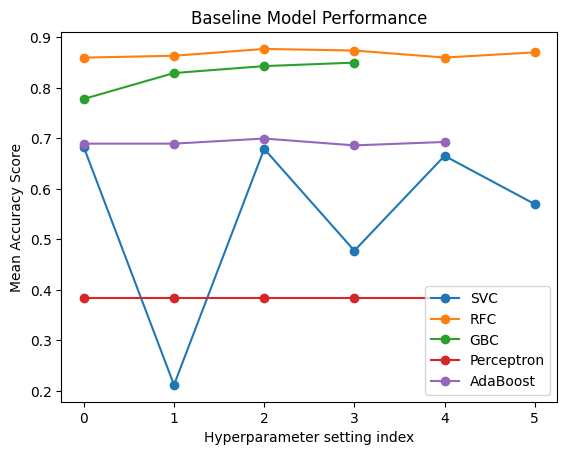

SVC - Best Params: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}, Best Score: 0.6825
RFC - Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}, Best Score: 0.8771
GBC - Best Params: {'learning_rate': 0.1, 'n_estimators': 100}, Best Score: 0.8500
Perceptron - Best Params: {'alpha': 0.0001, 'class_weight': 'balanced'}, Best Score: 0.3844
AdaBoost - Best Params: {'learning_rate': 0.01, 'n_estimators': 70}, Best Score: 0.6997


In [ ]:
# Plot the scores for each model/hyperparameter
for name in results:
    df = pd.DataFrame(results[name])
    plt.plot(range(len(df)), df['mean_test_score'], marker='o', label=name)

plt.title('Baseline Model Performance')
plt.xlabel('Hyperparameter setting index')
plt.ylabel('Mean Accuracy Score')
plt.legend(loc='lower right')
plt.show()

# Output the best model hyperparameters and performance
for model, performance in best_model_performance.items():
    print(f"{model} - Best Params: {performance[0]}, Best Score: {performance[1]:.4f}")

In [ ]:
X

array([[ 7.03000000e+00,  4.76000000e+00,  1.34267480e+04, ...,
         4.68160000e-01,  1.22938934e+04,  3.36839306e-01],
       [ 7.03000000e+00,  4.99000000e+00,  1.36047710e+04, ...,
        -1.21156000e+00,  1.24454873e+04,  3.36839306e-01],
       [ 7.03000000e+00,  5.07000000e+00,  1.36047710e+04, ...,
        -1.41509000e+00,  1.24454873e+04,  3.83633023e-01],
       ...,
       [ 5.33000000e+00,  5.33000000e+00,  2.25063650e+04, ...,
        -2.93706000e+00,  2.06037000e+04,  5.61723780e-01],
       [ 5.33000000e+00,  5.33000000e+00,  2.25063650e+04, ...,
        -2.16138000e+00,  2.06037000e+04,  5.61723780e-01],
       [ 5.33000000e+00,  5.33000000e+00,  2.25063650e+04, ...,
        -6.03829000e+00,  2.06933800e+04,  5.18527735e-01]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

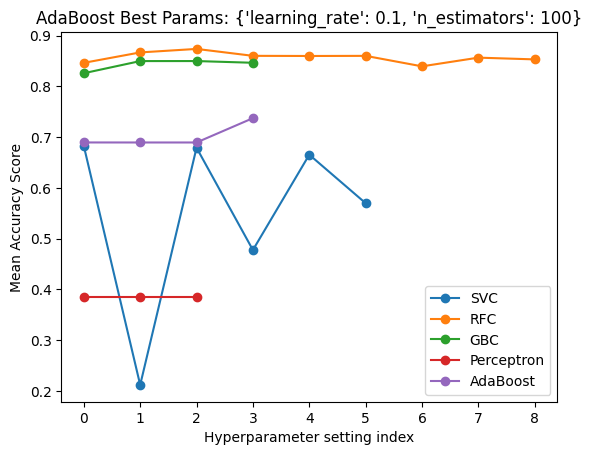

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.linear_model import Perceptron
# from sklearn.metrics import accuracy_score, make_scorer


# # Hyperparameters to tune
# param_grids = {
#     'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced']},
#     'RFC': {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15], 'class_weight': ['balanced']},
#     'GBC': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
#     'Perceptron': {'alpha': [0.0001, 0.001, 0.01], 'class_weight': ['balanced']},
#     'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
# }

# # Create classifiers
# classifiers = {
#     'SVC': SVC(),
#     'RFC': RandomForestClassifier(),
#     'GBC': GradientBoostingClassifier(),
#     'Perceptron': Perceptron(),
#     'AdaBoost': AdaBoostClassifier()
# }

# # Perform k-fold cross-validation and hyperparameter tuning
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# accuracy_scorer = make_scorer(accuracy_score)
# results = {}

# for name, clf in classifiers.items():
#     grid_search = GridSearchCV(clf, param_grids[name], cv=kf, scoring=accuracy_scorer)
#     grid_search.fit(X, y)
#     results[name] = grid_search.cv_results_

# # Plot the scores for each model/hyperparameter
# for name in results:
#     df = pd.DataFrame(results[name])
#     best_params = df.loc[df['rank_test_score'] == 1, 'params'].values[0]
#     plt.plot(range(len(df)), df['mean_test_score'], marker='o', label=name)
#     plt.title(f'{name} Best Params: {best_params}')

# plt.xlabel('Hyperparameter setting index')
# plt.ylabel('Mean Accuracy Score')
# plt.legend()
# plt.show()


In [ ]:
# merge metadata with texts

# Convert the date columns to datetime
economic_data['date'] = pd.to_datetime(economic_data['date'])
text_data['date'] = pd.to_datetime(text_data['date'])

# Sort the dataframes by date
economic_data = economic_data.sort_values('date')
text_data = text_data.sort_values('date')

# Perform an asof merge, which is similar to a left join except that we match on nearest key rather than equal keys
# Here 'tolerance' parameter can be set if you want to limit the maximum time difference allowed for matches
# 'direction' can be 'forward', 'backward', or 'nearest' to control the match direction
merged_data = pd.merge_asof(text_data, economic_data, on='date', direction='nearest')

# Save to a new CSV, if needed
merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
# Assuming 'merged_data' is your final DataFrame after preprocessing

# Normalize your continuous features
scaler = MinMaxScaler()
merged_data[continuous_features] = scaler.fit_transform(merged_data[continuous_features])

# Convert categorical rate decisions to a tensor-friendly format (e.g., one-hot encoding or integer encoding)
encoder = LabelEncoder()
merged_data['rate_decision'] = encoder.fit_transform(merged_data['rate_decision'])

from torch.utils.data import Dataset, DataLoader
import torch

class EconomicSentimentDataset(Dataset):
    def __init__(self, dataframe, input_features, target_column):
        self.dataframe = dataframe
        self.input_features = input_features
        self.target_column = target_column

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        inputs = torch.tensor(self.dataframe.iloc[idx][self.input_features].values.astype(np.float32))
        target = torch.tensor(self.dataframe.iloc[idx][self.target_column])
        return inputs, target

In [ ]:
# Define your features and target
input_features = ['feature1', 'feature2', 'sentiment_score']  # replace with your actual feature names
target_column = 'rate_decision'

# Create the dataset
dataset = EconomicSentimentDataset(merged_data, input_features, target_column)

# Split your dataset into train and test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create dataloaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# lstm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Define the LSTM model
class LSTMPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMPredictor, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Define the output layer
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are making a new forward pass.
        # We don't want to backprop through the entire training history
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        out = self.linear(out[:, -1, :])
        return out

# Parameters for the model and training
input_dim = len(economic_indices_columns) + 1 # plus one for sentiment score
hidden_dim = 64
num_layers = 2
output_dim = 3 # for 0, 1, -1 decisions
batch_size = 32
num_epochs = 10

# Create dataset and dataloaders
# ...

# Define the model
model = LSTMPredictor(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, output_dim=output_dim)
criterion = nn.CrossEntropyLoss() # as we have a classification problem
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test data: {} %'.format(100 * correct / total))
